# Proyek Recommendation System : Movie Recommendation-Content Based Filtering


*   Nama : Paramita Citra Indah Mulia
*   Email : paramitamulia@gmail.com





# Import Library yang Dibutuhkan

In [155]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [2]:
# Upload API Files from Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paramitacim","key":"9489966c8c3eb07ee70ccc7d459c7f9e"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata

100% 8.89M/8.89M [00:00<00:00, 92.0MB/s]
100% 8.89M/8.89M [00:00<00:00, 91.6MB/s]


In [5]:
!unzip tmdb-movie-metadata.zip

Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [91]:
df = pd.read_csv('/content/tmdb_5000_movies.csv')

In [92]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

* budget - biaya produksi film
* genre - genre film : Action, Comedy, Thriller, dll.
* homepage - link film
* id - id film
* keywords - Kata kunci atau tag yang terkait dengan film.
* original_language - Bahasa pembuatan film.
* original_title - Judul film sebelum diterjemahkan atau diadaptasi.
* overview - Deskripsi singkat film.
* popularity - Kuantitas numerik yang menentukan popularitas film.
* production_companies - Rumah produksi film.
* production_countries - Negara tempat film diproduksi.
* release_date - tanggal rilis.
* revenue - penghasilan dari film
* runtime - durasi film
* status - "Released" atau "Rumored".
* tagline - tagline film
* title - judul film
* ote_average - rating rata-rata
* vote_count - jumlah vote

# Univariate EDA

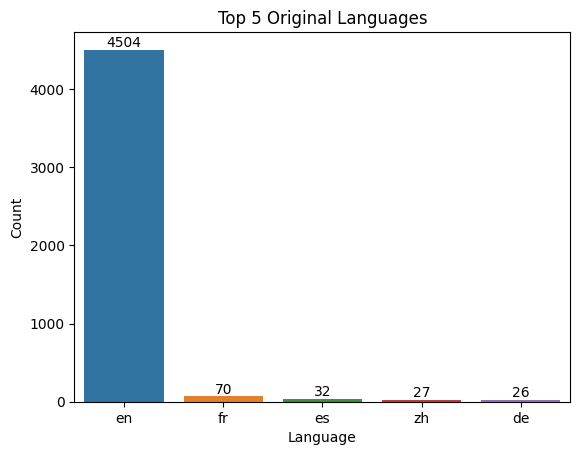

In [159]:
language_counts = df['original_language'].value_counts()

# Mengambil 5 nilai tertinggi
top_languages = language_counts.head(5)

# Membuat bar plot
ax = sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Top 5 Original Languages')
plt.ylabel('Count')
plt.xlabel('Language')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Dari 4803 data, sebanyak 4505 film menggunakan Bahasa Inggris.

In [162]:
genre = df['genres'].value_counts()
genre

[{"id": 18, "name": "Drama"}]                                                                                                            369
[{"id": 35, "name": "Comedy"}]                                                                                                           282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                          164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                         144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                              142
                                                                                                                                        ... 
[{"id": 12, "name": "Adventure"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]            1
[{"id": 28, "

Genre film terbanyak pada dataset ini adalah drama, komedi, drama-romance, comedy-romance, dan comedy-drama.

In [96]:
df['production_countries'].value_counts()

[{"iso_3166_1": "US", "name": "United States of America"}]                                                                                                                                     2977
[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                                                      181
[]                                                                                                                                                                                              174
[{"iso_3166_1": "GB", "name": "United Kingdom"}]                                                                                                                                                131
[{"iso_3166_1": "DE", "name": "Germany"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                                                             119
                    

Dari keseluruhan data, sebanyak 2977 film diproduksi oleh United States of America.

In [97]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


* Budget terbesar untuk pembuatan film pada dataset ini adalah 380 juta dolar
* Penghasilan terbesar dari film sebesar 2.7 miliar dolar
* Durasi film terpanjang yaitu 338 menit

# Data Preparation

In [138]:
#membuat dataframe baru
df2 = df[['id', 'title', 'overview']]
df2.head()

,id,title,overview
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [139]:
df2['id'].duplicated().sum()

0

tidak ada duplikasi data

In [140]:
df2.isnull().sum()

id          0
title       0
overview    0
dtype: int64

tidak ada missing value

**Data Cleaning**

In [142]:
# Inisialisasi stemmer dan stopwords
stemmer = PorterStemmer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Mengubah ke huruf kecil
    text = text.lower()

    # Menghapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Menghapus tanda baca dan angka
    text = re.sub(r'\W', ' ', text)

    # Menghapus spasi ekstra
    text = re.sub(r'\s+', ' ', text).strip()

    # Menghapus stopwords dan stemming
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
df = df.dropna(subset=['overview']) #memastikan tidak ada ada nan
df2['overview'] = df2['overview'].apply(clean_text) #implemen fungsi clean_text

In [144]:
df2.head(5)

,id,title,overview
0,19995,Avatar,22nd centuri parapleg marin dispatch moon pand...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believ dead come back li...
2,206647,Spectre,cryptic messag bond past send trail uncov sini...
3,49026,The Dark Knight Rises,follow death district attorney harvey dent bat...
4,49529,John Carter,john carter war weari former militari captain ...


**Pembobotan Kata**

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(df['overview'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['00', '000', '007', ..., 'été', 'única', 'über'], dtype=object)

In [146]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df['overview'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(4800, 21262)

Nilai 4800 merupakan ukuran data dan 21262 merupakan matrik overview.

In [147]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

**Cosine Similarity**

menghitung derajat kesamaan (similarity degree) antar film dengan teknik cosine similarity

In [149]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.03666088, 0.01944758, ..., 0.03270512, 0.01738049,
        0.01366019],
       [0.03666088, 1.        , 0.04343445, ..., 0.04862922, 0.03177526,
        0.02104553],
       [0.01944758, 0.04343445, 1.        , ..., 0.0405689 , 0.01699126,
        0.01825306],
       ...,
       [0.03270512, 0.04862922, 0.0405689 , ..., 1.        , 0.04629301,
        0.02385856],
       [0.01738049, 0.03177526, 0.01699126, ..., 0.04629301, 1.        ,
        0.04715488],
       [0.01366019, 0.02104553, 0.01825306, ..., 0.02385856, 0.04715488,
        1.        ]])

In [150]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (4800, 4800)


title,Cradle 2 the Grave,Street Kings,Bachelorette,Bad Words,Out of Africa
title,,,,,
Escape from Planet Earth,0.051908,0.023364,0.011403,0.011573,0.010095
Enchanted,0.033582,0.062131,0.041212,0.027625,0.069511
The Living Daylights,0.026414,0.094750,0.026199,0.034949,0.057806
Arthur Christmas,0.021952,0.063540,0.014933,0.028857,0.039902
Evita,0.030148,0.051267,0.031293,0.042093,0.073741
Wicked Blood,0.030882,0.033866,0.031496,0.040433,0.027472
Appaloosa,0.012400,0.085312,0.049023,0.026164,0.052379
The Expendables 3,0.051981,0.054759,0.040545,0.029664,0.043265
The Maid's Room,0.041833,0.020174,0.016784,0.021411,0.045089


**Mendapatkan Rekomendasi**

In [151]:
def recommendations(title, similarity_data=cosine_sim_df, items=df[['title', 'overview']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop title film agar judul film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

**Rekomendasi Film Mirip The Avengers**

In [152]:
df2[df2.title.eq('The Avengers')]

,id,title,overview
16,24428,The Avengers,unexpect enemi emerg threaten global safeti se...


In [153]:
# Mendapatkan rekomendasi restoran yang mirip dengan KFC
recommendations('The Avengers')

,title,overview
0,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...
1,Thank You for Smoking,The chief spokesperson and lobbyist Nick Naylo...
2,This Thing of Ours,"Using the Internet and global satellites, a gr..."
3,Plastic,Sam &amp; Fordy run a credit card fraud scheme...
4,Wall Street: Money Never Sleeps,As the global economy teeters on the brink of ...
